In [2]:
# Importing Standard Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset
data = pd.read_csv("../data.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index("Date", inplace = True)

# Displaying first 5 rows of "data" DataFrame
data.head()

,spx,spx_ret,spx_vol
Date,,,
1994-01-06,467.119995,NaN,NaN
1994-01-07,469.899994,0.595136,0.595136
1994-01-10,475.269989,1.142795,1.142795
1994-01-11,474.130005,-0.239860,0.239860
1994-01-12,474.170013,0.008438,0.008438


In [3]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (6518, 3)
Testing Set Shape -  (174, 3)


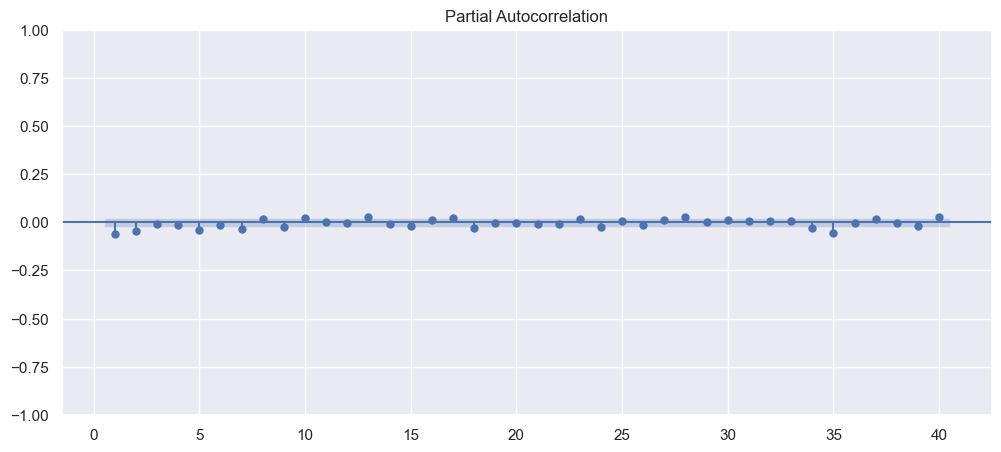

In [4]:
# Importing Required Package
import statsmodels.graphics.tsaplots as sgt

# Setting the figure size
plt.rcParams["figure.figsize"] = 12, 5

# PCF Plot for S&P 500 Returns
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 40)

# Displaying the plot
plt.show()

In [9]:
# Importing required package
from arch import arch_model

# Building Dataframe for fitting GARCH model
garch_df = pd.DataFrame(data["spx_ret"].shift(1).loc[data.index])
garch_df.loc[train_df.index, "spx_ret"] = train_df["spx_ret"]

# Instantating the model with the full dataset, parameters and specifying the model to be a GARCH model
model = arch_model(garch_df["spx_ret"][1:], p = 2, q = 2, vol = "GARCH")
# Fitting the model on all the data just before the date specified in "last_obs" argument
model_results = model.fit(last_obs = test_df.index[0], update_freq = 5)
# Printing the Summary table of the fitted model
model_results.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 2974562376.5393624
Iteration:     10,   Func. Count:     90,   Neg. LLF: 8627.660249659442
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8627.645162302633
            Iterations: 14
            Function evaluations: 119
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                spx_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8627.65
Distribution:                  Normal   AIC:                           17267.3
Method:            Maximum Likelihood   BIC:                           17308.0
                                        No. Observations:                 6517
Date:                Tue, Dec 05 2023   Df Residuals:                     6516
Time:                        08:20:19   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.674e-03      6.491  8.516e-11 [4.384e-02,8.176e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0257  6.715e-03      3.821  1.331e-04 [1.250e-02,3.882e-02]
alpha[1]       0.0608  1.568e-02      3.875  1.067e-04 [3.003e-02,9.149e-02]
alpha[2]       0.0976  2.144e-02      4.553  5.300e-06   [5.560e-02,  0.140]
beta[1]        0.3081      0.137      2.245  2.479e-02   [3.908e-02,  0.577]
beta[2]        0.5133      0.127      4.051  5.098e-05     [  0.265,  0.762]
============================================================================

Covariance estimator: robust
"""

C:\Users\Anxia\anaconda3\envs\finEnv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


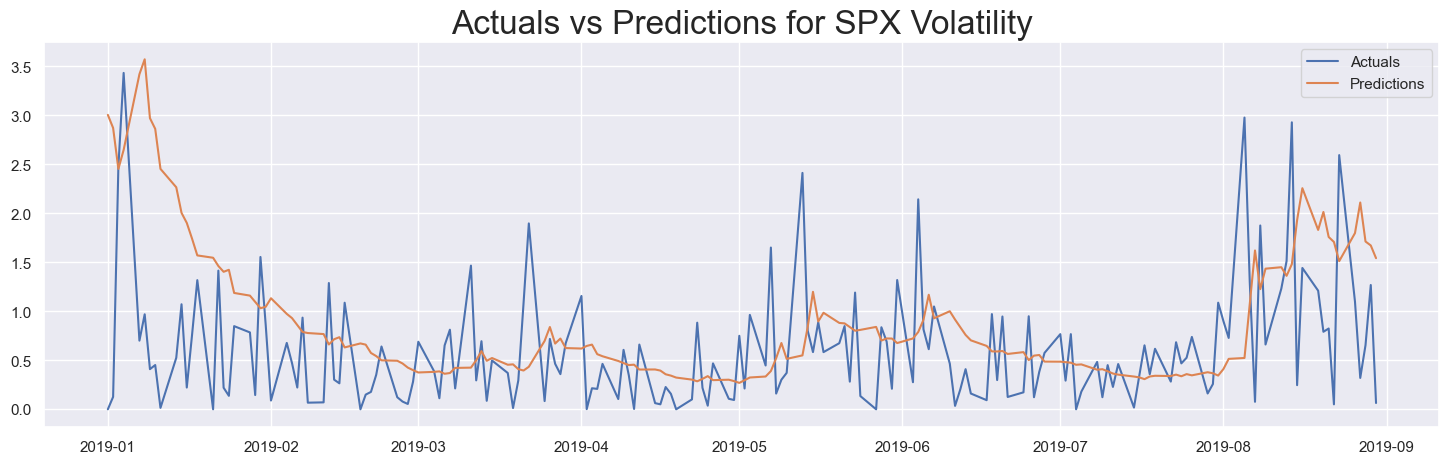

In [7]:

# FORECASTING
# Building Predictions Data
predictions_df = test_df.copy()
# Predictions
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[test_df.index]

# PLOTTING FORECASTS
# Setting the Figure Size
plt.rcParams["figure.figsize"] = 18, 5

# Plotting the Predictions and the test data
plt.plot(predictions_df["spx_vol"], label = "Actuals")
plt.plot(predictions_df["Predictions"], label = "Predictions")

# Setting the Title
plt.title("Actuals vs Predictions for SPX Volatility", size = 24)

# Displaying the labels and the plot respectively
plt.legend()
plt.show()